In [97]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')

In [98]:
df = pd.read_csv('/Users/jsheng/Desktop/北邮机器学习/input_data/train.csv')

In [99]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [100]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [101]:
df.shape # 10886条数据，初始12个维度

(10886, 12)

In [102]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [103]:
df.groupby('season')['count'].count() # 四个季节租车量情况描述

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

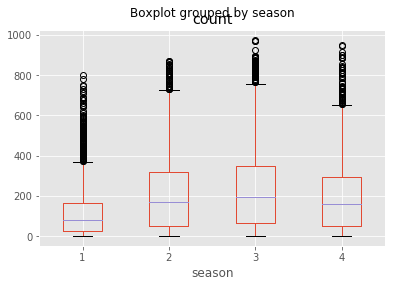

In [104]:
df.boxplot(column='count', by='season') # 季节对租车量的影响，明显spring异常

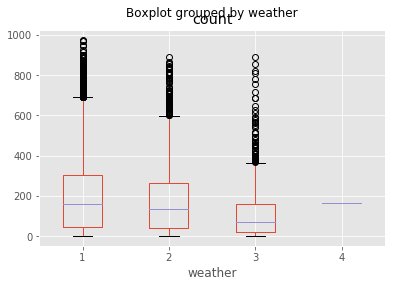

In [105]:
df.boxplot(column='count', by='weather') # 天气对租车量的影响，越和谐的天气租车人越多，第四种恶劣的环境没人租车..情理之中

In [106]:
df.groupby('holiday')['datetime'].count() # holiday单独出现的

holiday
0    10575
1      311
Name: datetime, dtype: int64

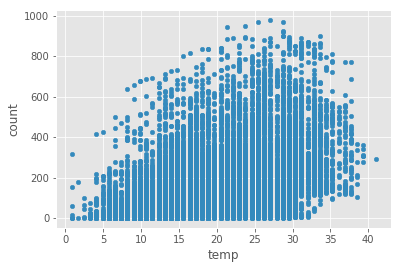

In [107]:
df.plot.scatter(x='temp', y='count') # 温度和订单温度的散点图

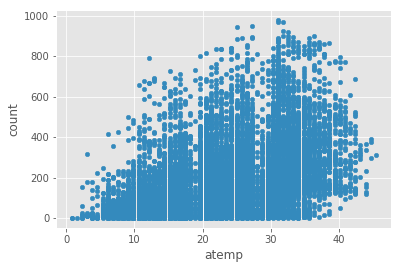

In [108]:
df.plot.scatter(x='atemp', y='count') # 体感温度和订单温度的散点图，和上面的图没啥太大差别

In [109]:
df['windspeed'].describe() # 风速的大概情况

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [110]:
df['date'] = df['datetime'].apply(lambda x:x.split()[0])
df['time'] = df['datetime'].apply(lambda x:x.split()[1])
df['month'] = df['date'].apply(lambda x:calendar.month_name[datetime.strptime(x, "%Y-%m-%d").month])
df['weekday'] = df['date'].apply(lambda x:calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])
df['hour'] = df['time'].apply(lambda x:x.split(':')[0])

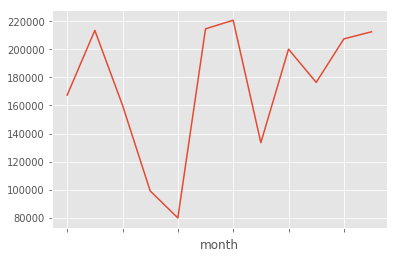

In [111]:
mc = df.groupby('month')['count'].sum().plot() # 月份和租借总量的关系，5，6月份是高峰

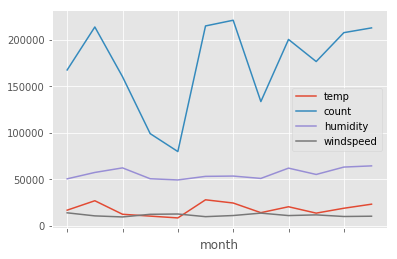

In [112]:
mc = df.groupby('month')['temp', 'count', 'humidity', 'windspeed'].sum().plot() # 温度温和租借量越高，湿度和风力影响不大

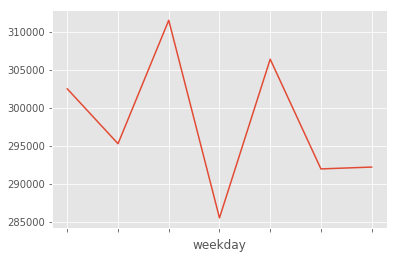

In [113]:
mc = df.groupby('weekday')['count'].sum().plot() # 周末租车的人较多，周一周二可能上班积极租车多？

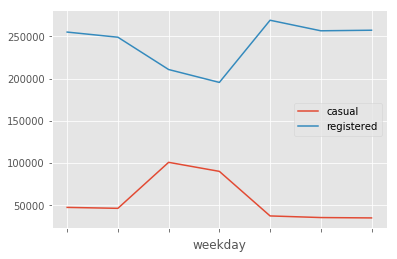

In [114]:
mc = df.groupby('weekday')['casual', 'registered'].sum().plot()

In [115]:
df["season"] = df.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df['weather'] = df.weather.map({1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                               2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                               3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                               4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
                              })

In [116]:
df[['season', 'weather']].head() # map一下

,season,weather
0,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [117]:
# 将一些特征转成cate
cate_cols = ["hour","weekday","month","season","weather","holiday","workingday"]
for col in cate_cols:
    df[col] = df[col].astype('category')

In [118]:
# 去掉用不上的特征
df = df.drop(['datetime'], axis=1)

In [119]:
import missingno as msno           

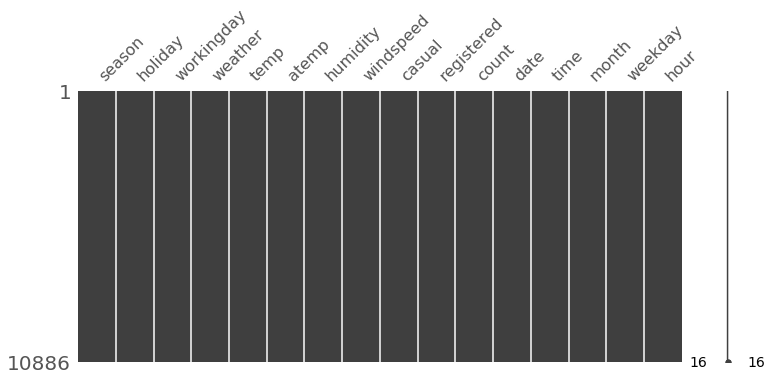

In [120]:
msno.matrix(df, figsize=(12, 5))  # 看有没有missing value, 没有

[Text(0,0.5,'Count'),
 Text(0.5,0,'Workingday'),
 Text(0.5,1,'Count difference between Workingday')]

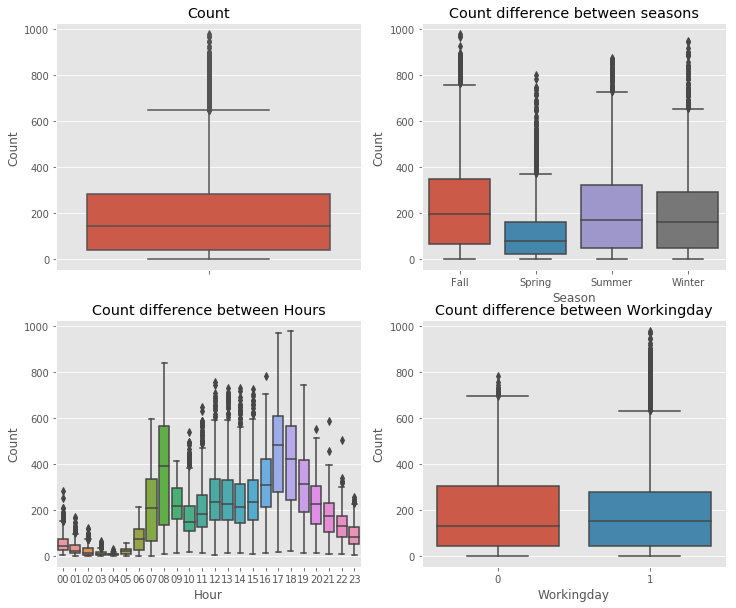

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=df, y='count', orient='v', ax=axes[0][0])
sn.boxplot(data=df, x='season', y='count', orient='v', ax=axes[0][1])
sn.boxplot(data=df, x='hour', y='count', orient='v', ax=axes[1][0])
sn.boxplot(data=df, x='workingday', y='count', orient='v', ax=axes[1][1])
axes[0][0].set(yLabel='Count', title='Count') 
axes[0][1].set(xLabel='Season', yLabel='Count', title='Count difference between seasons') # spring 异常值较多
axes[1][0].set(xLabel='Hour', yLabel='Count', title='Count difference between Hours') # 上下班的时间租车人较多，前半夜比后半夜租车人多
axes[1][1].set(xLabel='Workingday', yLabel='Count', title='Count difference between Workingday')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

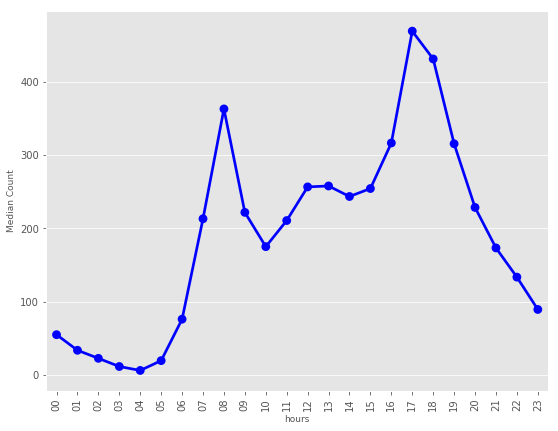

In [122]:
grouped_hour_count = df.groupby('hour')['count'].aggregate(np.mean).reset_index()
plt.figure(figsize=(9, 7))
sn.pointplot(grouped_hour_count['hour'].values, grouped_hour_count['count'].values, alpha=0.8, color='blue')
plt.ylabel('Median Count', fontsize=9)
plt.xlabel('hours', fontsize=9)
plt.xticks(rotation='vertical')

In [123]:
count_std = df['count'].std() # 方差
df = df[np.abs(df['count']-df['count'].mean())<=3*count_std] # 把异常的数据删掉
df.shape

(10739, 16)

In [124]:
df = df.drop(['time'], axis=1)
df.shape

(10739, 15)

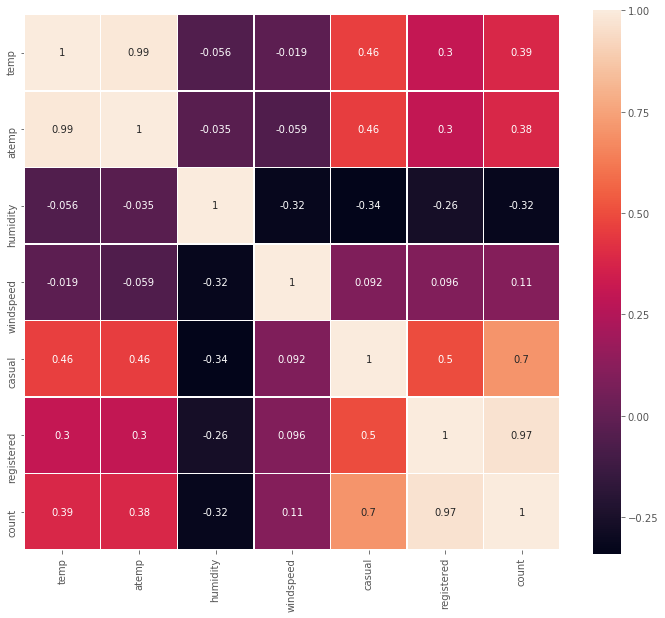

In [125]:
internal_chars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
corrmat = df[internal_chars].corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='90')
sn.heatmap(corrmat, square=True, linewidth=.5, annot=True)
# 温度和租借量是正相关的，湿度和租借量是负相关的，风速没啥影响
# casual 和 registered 是leakage的，在实际中获取不到

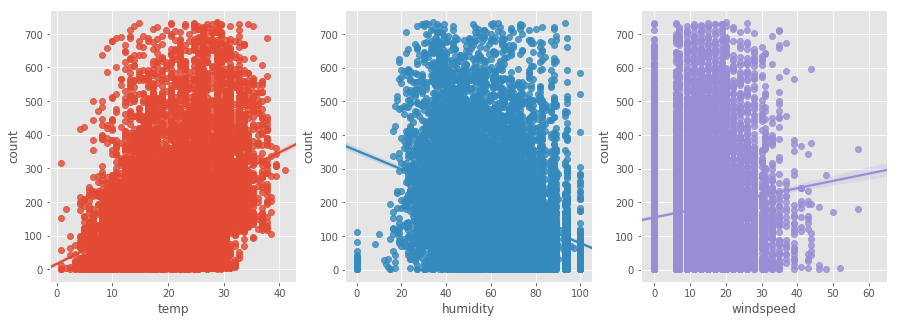

In [126]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
sn.regplot(data=df, x='temp', y='count', ax=axes[0])
sn.regplot(data=df, x='humidity', y='count', ax=axes[1])
sn.regplot(data=df, x='windspeed', y='count', ax=axes[2])
# 温度正相关程度大，湿度负相关程度大，看斜率。

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229778, 4.562423868087808, 0.9581176780909615))

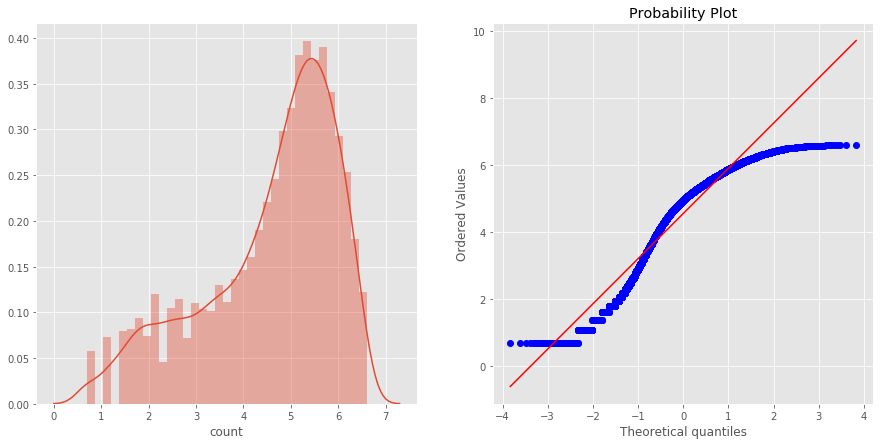

In [127]:
# 看一下count的distribution, 转成log看着舒服，大体符合正太分布, 有些短尾分布
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(15, 7)
sn.distplot(np.log1p(df['count']), ax=axes[0])
stats.probplot(np.log1p(df["count"]), dist='norm', fit=True, plot=axes[1]) 

[Text(0,0.5,'count'),
 Text(0.5,0,'hours'),
 Text(0.5,1,'count in hours across casual and registered')]

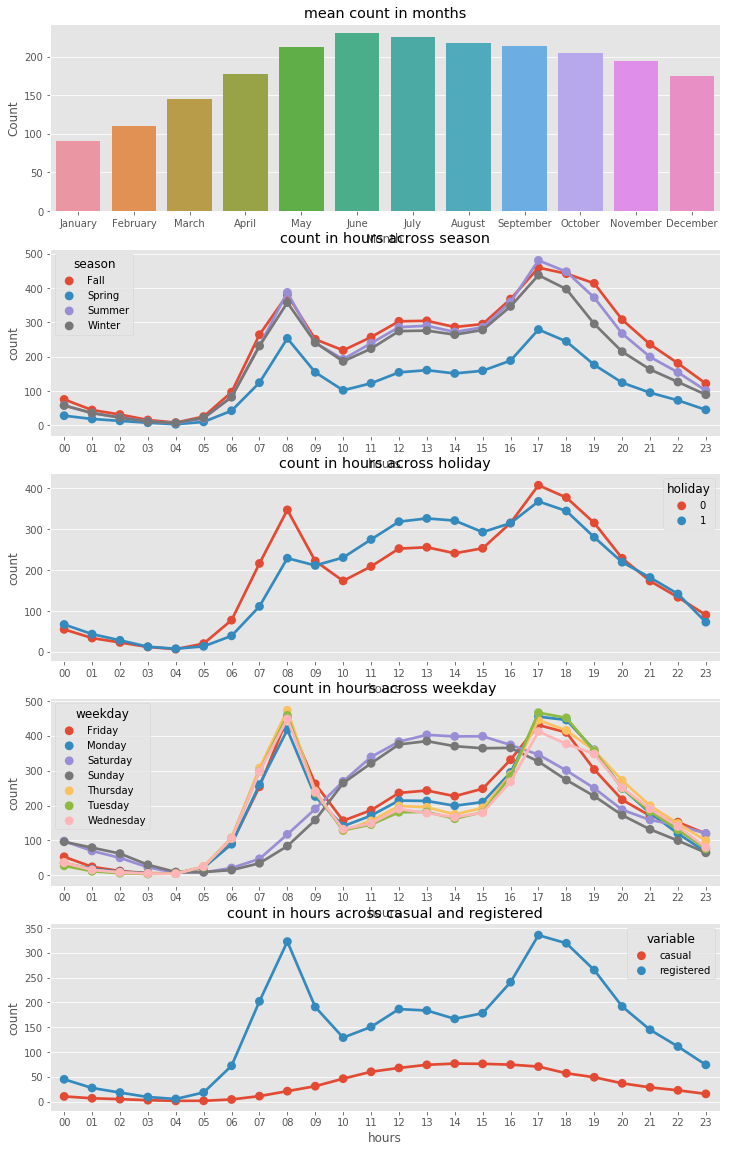

In [144]:
fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# 5月份之后租借量高，1-4月租借量逐渐提高
month_avr = pd.DataFrame(df.groupby('month')['count'].mean()).reset_index()
sn.barplot(data=month_avr, order=sortOrder, x='month', y='count', ax=axes[0])
axes[0].set(xlabel='Month', ylabel='Count', title='mean count in months')

# 冬天租借量明显低于其他季节，其他三个季节租借量大体相同
hour_season = pd.DataFrame(df.groupby(['hour', 'season'], sort=True)['count'].mean()).reset_index()
sn.pointplot(x=hour_season['hour'], y=hour_season['count'], hue=hour_season['season'], data=hour_season, join=True, ax=axes[1])
axes[1].set(xlabel='hours', ylabel='count', title='count in hours across season')

# 假期时白天时间租借量较多，工作日上下班时间租借量多
hour_holiday = pd.DataFrame(df.groupby(['hour', 'holiday'], sort=True)['count'].mean()).reset_index()
sn.pointplot(x=hour_holiday['hour'], y=hour_holiday['count'], hue=hour_holiday['holiday'], data=hour_holiday, join=True, ax=axes[2])
axes[2].set(xlabel='hours', ylabel='count', title='count in hours across holiday')

# 工作日每天的分布近似相同，假期时每天的分布近似相同
hour_holiday = pd.DataFrame(df.groupby(['hour', 'weekday'], sort=True)['count'].mean()).reset_index()
sn.pointplot(x=hour_holiday['hour'], y=hour_holiday['count'], hue=hour_holiday['weekday'], data=hour_holiday, join=True, ax=axes[3])
axes[3].set(xlabel='hours', ylabel='count', title='count in hours across weekday')

# 早晚高峰还是有很多人办了卡
hour_transform = pd.melt(df[['hour', 'casual', 'registered']], id_vars=['hour'], value_vars=['casual', 'registered'])
hour_cg = pd.DataFrame(hour_transform.groupby(['hour', 'variable'], sort=True)['value'].mean()).reset_index()
sn.pointplot(x=hour_cg['hour'], y=hour_cg['value'], hue=hour_cg['variable'], data=hour_cg, join=True, ax=axes[4])
axes[4].set(xlabel='hours', ylabel='count', title='count in hours across casual and registered')

In [145]:
print('analysis done!')

analysis done!
